# Stock Price Predictor

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [51]:
start = '2021-01-01'
end = '2025-06-30'
stock = 'GOOG'
data = yf.download(stock , start, end, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [52]:
data.reset_index(inplace = True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2021-01-04,85.824684,86.412003,88.032501,85.392502,87.876999,38038000
1,2021-01-05,86.454361,87.045998,87.383499,85.900749,86.250000,22906000
2,2021-01-06,86.174782,86.764503,87.400002,84.949997,85.131500,52042000
3,2021-01-07,88.755127,89.362503,89.419998,86.852501,87.002998,45300000
4,2021-01-08,89.746338,90.360497,90.491997,88.676750,89.399002,41012000
...,...,...,...,...,...,...,...
1121,2025-06-23,165.861755,166.009995,168.479996,163.330002,167.320007,36975600
1122,2025-06-24,167.590210,167.740005,169.250000,166.910004,167.684998,27310300
1123,2025-06-25,171.336868,171.490005,173.360001,168.561005,168.649994,23627400


In [53]:
m_avg100days = data.Close.rolling(100).mean()

In [54]:
m_avg200days = data.Close.rolling(200).mean()

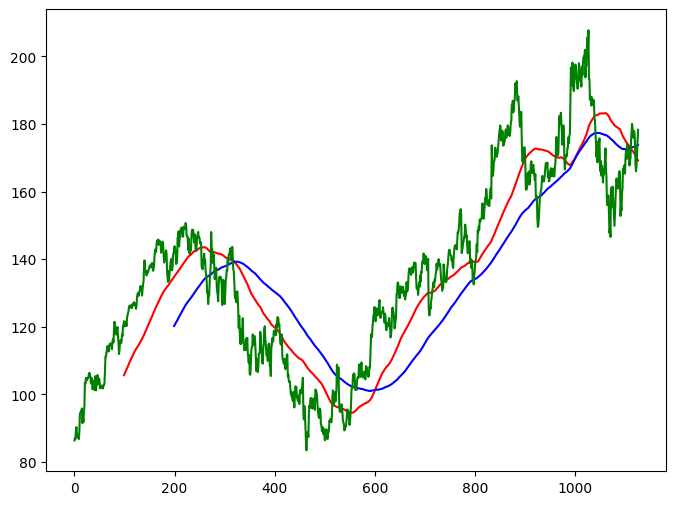

In [55]:
plt.figure(figsize=(8,6))
plt.plot(m_avg100days, 'r')
plt.plot(m_avg200days, 'b')
plt.plot(data.Close, 'g')
plt.show()


## Data preprocessing

In [56]:
data.dropna(inplace = True) #Drops every datapoint with missing values/ MIssing values handling

In [57]:
from sklearn.model_selection import train_test_split
# Split into train (80%) and test (20%)
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=False)

In [58]:
data_train.shape[:]

(900, 7)

In [59]:
data_test.shape[:]

(226, 7)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [61]:
data_train = pd.DataFrame(data_train.Close)
data_test = pd.DataFrame(data_test.Close)
data_train_scale = scaler.fit_transform(data_train)

In [62]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i]) #Takes last 100 days data
    y.append(data_train_scale[i, 0]) # makes a list of the 101tth day data
x, y = np.array(x), np.array(y)

## Modeling

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [64]:
model = Sequential()

# 1st LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

# 2nd LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output
model.add(Dense(units=1))

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\abnsa\anaconda3\envs\Tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.1254
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0071
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0047
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0042
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0040
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0045
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0041
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0042
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0040
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0037
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0038
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0039
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0035
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0038
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0035
Epoc

In [66]:
# Adding the past 100 days data from train to test dataset. This is to give the test phase to have idea about the final day data 
past_100_days = data_train.tail(100)
final_test = pd.concat([past_100_days, data_test], ignore_index=True)
data_test_scale = scaler.transform(data_test)

In [83]:
x_test, y_test = [], []
for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i, 0]) 
x_test, y_test = np.array(x_test), np.array(y_test)

In [84]:
y_predict = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [85]:
y_predict = scaler.inverse_transform(y_predict.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

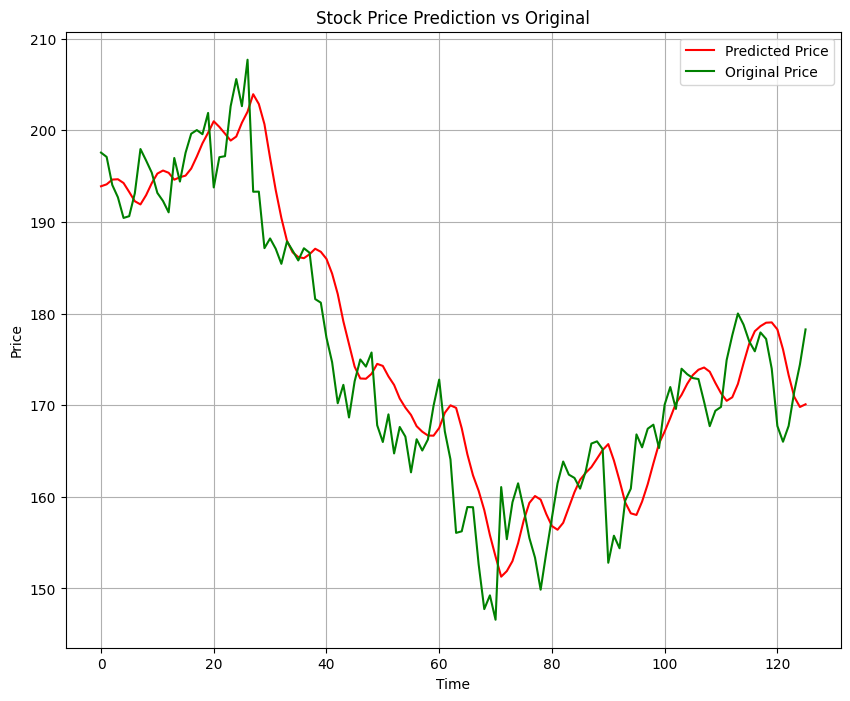

In [86]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, color='red', label='Predicted Price')
plt.plot(y_test, color='green', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction vs Original')
plt.legend()
plt.grid(True)
plt.show()

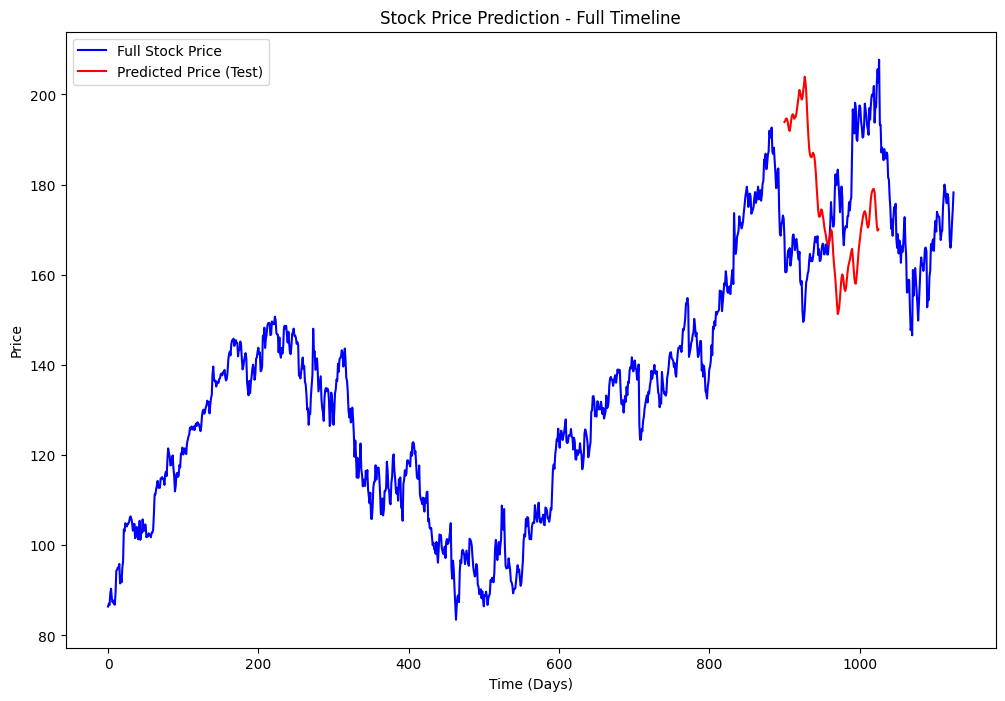

In [87]:
plt.figure(figsize=(12,8))

# Plot all stock prices (training + testing)
plt.plot(data['Close'], color='blue', label='Full Stock Price')

# Align predictions with timeline
train_len = len(data_train)

# Create empty array same length as data
pred_plot = [None] * train_len + list(y_predict.flatten())

# Plot predicted prices starting from the test section
plt.plot(pred_plot, color='red', label='Predicted Price (Test)')

plt.xlabel('Time (Days)')
plt.ylabel('Price')
plt.title('Stock Price Prediction - Full Timeline')
plt.legend()
plt.show()

In [88]:
model.save('Stock Prediction Model.keras')